<a href="https://colab.research.google.com/github/HariAcidReign/DS-and-ML-Resources/blob/master/TFandKerasMNISTDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Making a CNN using Keras and Tensorflow
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
mnist = tf.keras.datasets.mnist # Handwritten 28x28 images of digits from 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


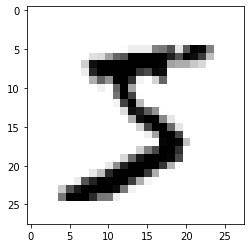

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [12]:
# Converting scaling from 0-255 to 0-1 to make things easier
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

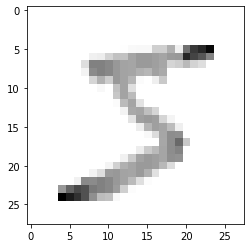

In [13]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [14]:
# Use a seqential model (feed data forward)
model = tf.keras.models.Sequential()

In [17]:
# Now we unroll the vector values from 28x28. We can use reshape (numpy) or use keras layers (flatten)
model.add(tf.keras.layers.Flatten())

In [20]:
# Add our 2 hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#128 units per layer (neutons),activation function to to fire neuron: can use sigmoid or relu. Used relu here (default)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Output layer

In [21]:
# Params for training the model
# Optimizer can be Gradient descent(gd) but the default is "adam"
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# Use binary categorical crossentropy when only 2 o/p like Dog and Cat. Here its 0-9 so used sparse

In [22]:
# Now we train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4211 - accuracy: 0.8725
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1395 - accuracy: 0.9611
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0981 - accuracy: 0.9724


In [23]:
# To check if the model has overfitted to get this high accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Val loss: ", val_loss, "Val accuracy: ", val_acc)
# Not bad at all

313/313 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9635
Val loss:  0.12771093845367432 Val accuracy:  0.9635000228881836


In [24]:
model.save('numReader.model')
new_model = tf.keras.models.load_model('numReader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: numReader.model/assets


In [26]:
predictions = new_model.predict([x_test])  #Note that its a list

In [27]:
import numpy as np
print(np.argmax(predictions[0]))

7


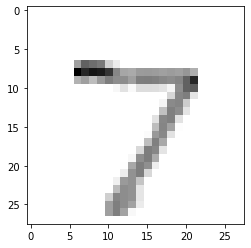

In [28]:
plt.imshow(x_test[0], cmap = plt.cm.binary)

4


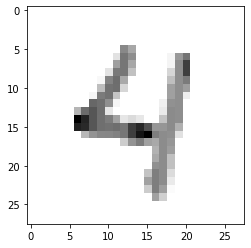

In [35]:
# Clearly its a match. Now, another example
plt.imshow(x_test[27], cmap = plt.cm.binary)
print(np.argmax(predictions[27]))